<a href="https://colab.research.google.com/github/2303a51508/AIML_2025/blob/main/Prediction_Of_Solar_Radiation_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score


LOAD THE DATASET

In [ ]:
data = pd.read_csv('/content/SolarPrediction.csv')

PREPROCESS THE DATA

In [ ]:
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

Dataset Head:
      UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 

In [ ]:
features = ['Temperature', 'Humidity', 'WindDirection(Degrees)']

In [ ]:
X = data[features].values
y = data['Radiation'].values

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


BUILD ANN MODEL

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TRAIN ANN MODEL

In [ ]:
# prompt: perform ANN for 10 epochs and find final test accuracy

# TRAIN ANN MODEL
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# EVALUATE ANN MODEL
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared on Test Data: {r2}")


Epoch 1/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34308.3477 - val_loss: 36773.8906
Epoch 2/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 34194.4805 - val_loss: 36726.5273
Epoch 3/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 35060.2305 - val_loss: 36766.2812
Epoch 4/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 33615.6055 - val_loss: 36556.5312
Epoch 5/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34723.2930 - val_loss: 36532.2695
Epoch 6/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33638.9141 - val_loss: 36407.4258
Epoch 7/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 33714.4648 - val_loss: 36366.5742
Epoch 8/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34302.3672 - val_loss: 36433.1367
Epoch 9/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33596.3945 - val_loss: 36402.2617
Epoch 10/10
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 33806.6289 - val_loss: 36093.2422
Mean Squared Error on Test Data: 34244.74609375
205/205 ━━━

EVALUATE THE MODEL

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"\nTest Loss (MSE): {loss:.2f}")


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34738.4766

Test Loss (MSE): 34716.41


PREDICT

In [ ]:
y_pred = model.predict(X_test)


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


METRICS

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 34716.41
R^2 Score: 0.65


VISUALIZATION

PLOTTING

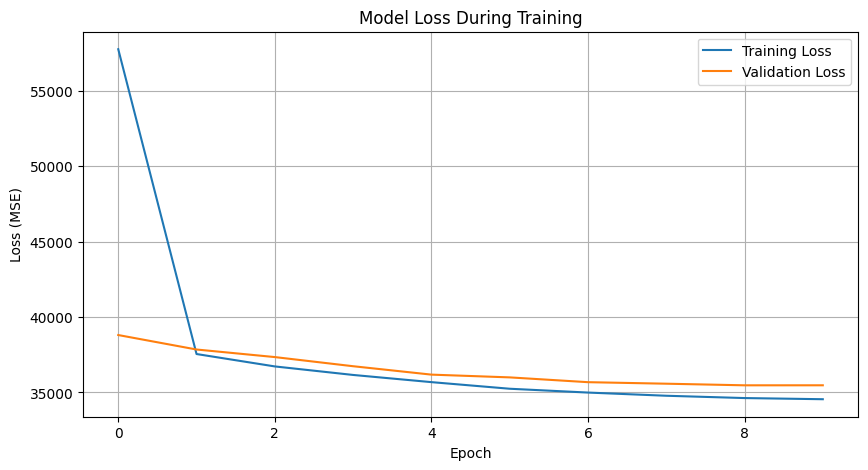

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


RESIDUALS PLOT

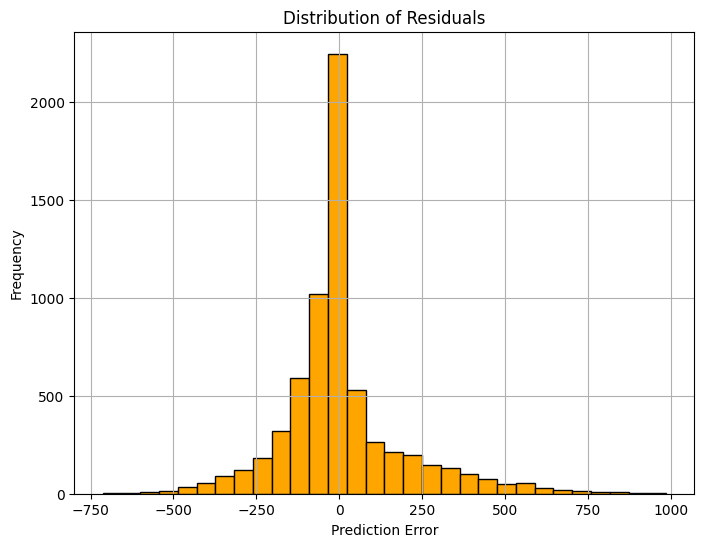

In [ ]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) # Now mean_absolute_error is defined
r2 = r2_score(y_test, y_pred)


mask = y_test != 0
within_tolerance = np.abs((y_test[mask] - y_pred[mask]) / y_test[mask]) <= 0.10
custom_accuracy = np.mean(within_tolerance) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Custom Accuracy (within ±10%): {custom_accuracy:.2f}%")


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Squared Error (MSE): 163373.47
Mean Absolute Error (MAE): 253.71
R² Score: -0.6445
Custom Accuracy (within ±10%): 0.00%


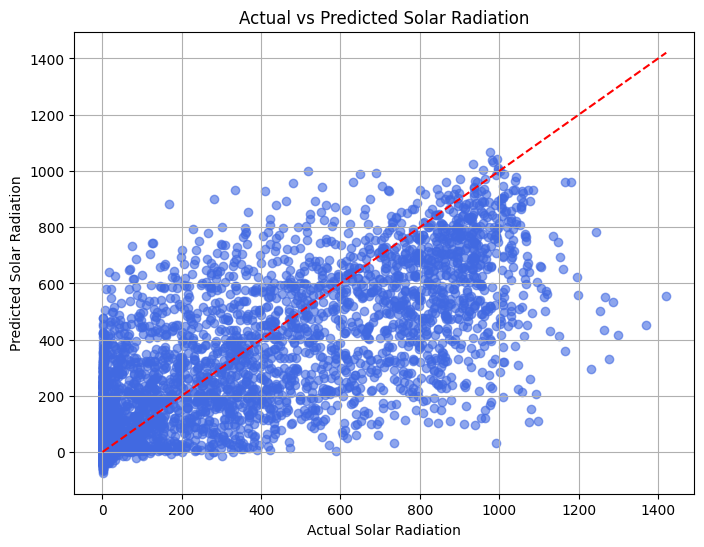

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Solar Radiation")
plt.ylabel("Predicted Solar Radiation")
plt.title("Actual vs Predicted Solar Radiation")
plt.grid(True)
plt.show()


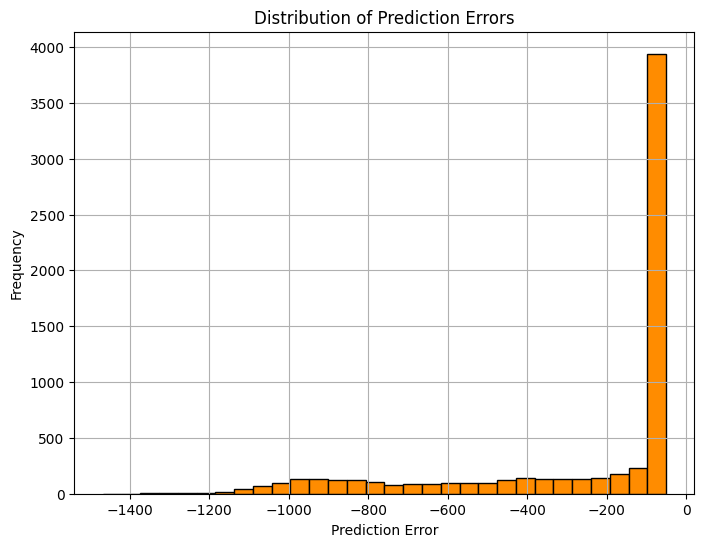

In [ ]:
errors = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='darkorange', edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

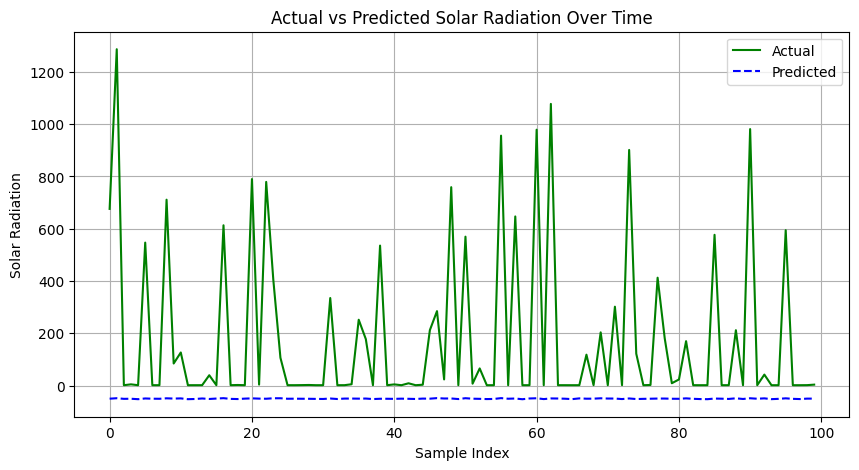

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual', color='green')
plt.plot(y_pred[:100], label='Predicted', color='blue', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Solar Radiation")
plt.title("Actual vs Predicted Solar Radiation Over Time")
plt.legend()
plt.grid(True)
plt.show()
